# Lab Assignment 5 - Topic Modeling with BERT 

**1.Author:Balbir Singh**

**2.ASU-ID:1233870107**

**3.File Creation Date: 2025-03-03**

In [9]:
#Code Cell 1- Library and data import.
!pip install bertopic


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Users\\balbi\\Downloads\\restaurant_reviews_az.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48147 entries, 0 to 48146
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    48147 non-null  object
 1   user_id      48147 non-null  object
 2   business_id  48147 non-null  object
 3   stars        48147 non-null  int64 
 4   useful       48147 non-null  int64 
 5   funny        48147 non-null  int64 
 6   cool         48147 non-null  int64 
 7   text         48147 non-null  object
 8   date         48147 non-null  object
dtypes: int64(4), object(5)
memory usage: 3.3+ MB


(None,
                 review_id                 user_id             business_id  \
 0  IVS7do_HBzroiCiymNdxDg  fdFgZQQYQJeEAshH4lxSfQ  sGy67CpJctjeCWClWqonjA   
 1  QP2pSzSqpJTMWOCuUuyXkQ  JBLWSXBTKFvJYYiM-FnCOQ  3w7NRntdQ9h0KwDsksIt5Q   
 2  oK0cGYStgDOusZKz9B1qug  2_9fKnXChUjC5xArfF8BLg  OMnPtRGmbY8qH_wIILfYKA   
 3  E_ABvFCNVLbfOgRg3Pv1KQ  9MExTQ76GSKhxSWnTS901g  V9XlikTxq0My4gE8LULsjw   
 4  Rd222CrrnXkXukR2iWj69g  LPxuausjvDN88uPr-Q4cQA  CA5BOxKRDPGJgdUQ8OUOpw   
 
    stars  useful  funny  cool  \
 0      3       1      1     0   
 1      5       1      1     1   
 2      5       1      0     0   
 3      5       0      0     0   
 4      4       1      0     0   
 
                                                 text                 date  
 0  OK, the hype about having Hatch chili in your ...  2020-01-27 22:59:06  
 1  Pandemic pit stop to have an ice cream.... onl...  2020-04-19 05:33:16  
 2  I was lucky enough to go to the soft opening a...  2020-02-29 19:43:44  
 3  I've 

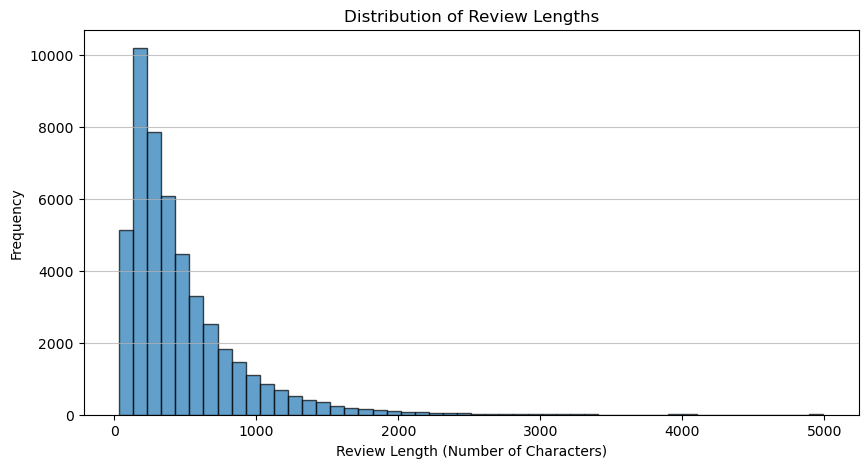

In [18]:
#Code Cell 2 - Calculate and visualize the distribution of review length.
df['review_length'] = df['text'].apply(len)

# Plot distribution of review lengths
plt.figure(figsize=(10, 5))
plt.hist(df['review_length'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Review Length (Number of Characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [12]:
#CODE CELL 3:Build a BERTopic Model with UMAP (target dimension of 5, n_neighbors of 15, and the usage of cosine similarity to measure the distance).

from bertopic import BERTopic
import umap
from sklearn.feature_extraction.text import CountVectorizer

# Reduce dataset size to speed up processing (adjust if needed)
df_sample = df.sample(n=10000, random_state=42)
documents_sample = df_sample['text'].astype(str).tolist()

# Create UMAP model (keeping assignment requirements)
umap_model = umap.UMAP(n_neighbors=15, n_components=5, metric='cosine', random_state=42)

# Use TF-IDF for vectorization (faster than Transformer embeddings)
vectorizer_model = CountVectorizer(stop_words="english")

# Initialize BERTopic with UMAP and TF-IDF vectorization
topic_model = BERTopic(umap_model=umap_model, vectorizer_model=vectorizer_model, verbose=True)

#Fit BERTopic model on sampled text data
topics, probs = topic_model.fit_transform(documents_sample)

# Display the top 10 topics
topic_model.get_topic_info().head(10)

2025-03-03 01:04:59,253 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

2025-03-03 01:09:41,774 - BERTopic - Embedding - Completed ✓
2025-03-03 01:09:41,778 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-03 01:11:14,112 - BERTopic - Dimensionality - Completed ✓
2025-03-03 01:11:14,115 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-03 01:11:15,374 - BERTopic - Cluster - Completed ✓
2025-03-03 01:11:15,389 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-03 01:11:16,907 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,4774,-1_food_good_great_place,"[food, good, great, place, service, ordered, j...",[Great spot we hit after hiking in Saguaro Nat...
1,0,729,0_order_minutes_told_said,"[order, minutes, told, said, manager, asked, t...",[This was the worst experience I've ever had. ...
2,1,569,1_pizza_crust_italian_pizzas,"[pizza, crust, italian, pizzas, pasta, sauce, ...",[This pizza tasted worse than like airport or ...
3,2,346,2_tucson_great_place_favorite,"[tucson, great, place, favorite, food, breakfa...",[Great breakfast and great variety! Service i...
4,3,274,3_mask_masks_covid_wearing,"[mask, masks, covid, wearing, safe, covid19, w...",[I'd give it 0 stars if I could. The first tim...
5,4,202,4_tacos_taco_birria_asada,"[tacos, taco, birria, asada, street, carne, fi...",[The Steamer dish was very good; it was fresh ...
6,5,201,5_burger_burgers_fries_tots,"[burger, burgers, fries, tots, bun, graze, bac...",[The service and ambiance were good and so wer...
7,6,148,6_sushi_roll_rolls_tuna,"[sushi, roll, rolls, tuna, eat, fish, quality,...",[Me and my wife used to go here quite a bit. ...
8,7,114,7_brisket_bbq_ribs_pulled,"[brisket, bbq, ribs, pulled, pork, mac, sides,...",[Delicious BBQ had the combo plate with ribs a...
9,8,97,8_thai_pad_tuk_curry,"[thai, pad, tuk, curry, rice, spicy, food, dis...",[Ordered carryout pad thai from here. If the p...


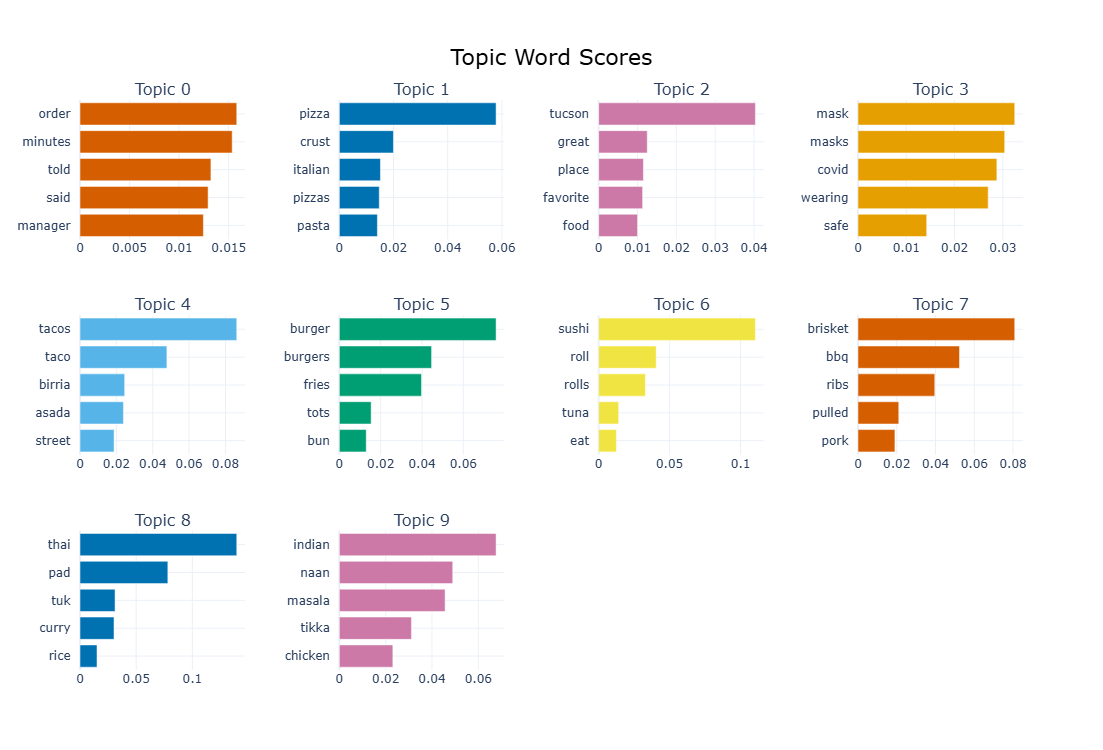

In [11]:
# Cell 4  - Visualize the most relevant words for the top 10 topics
#Now that the BERTopic model has been successfully trained, let's visualize the most relevant words for the top 10 topics.

# Generate the barchart visualization for the top 10 topics
fig = topic_model.visualize_barchart(top_n_topics=10)
fig.show()


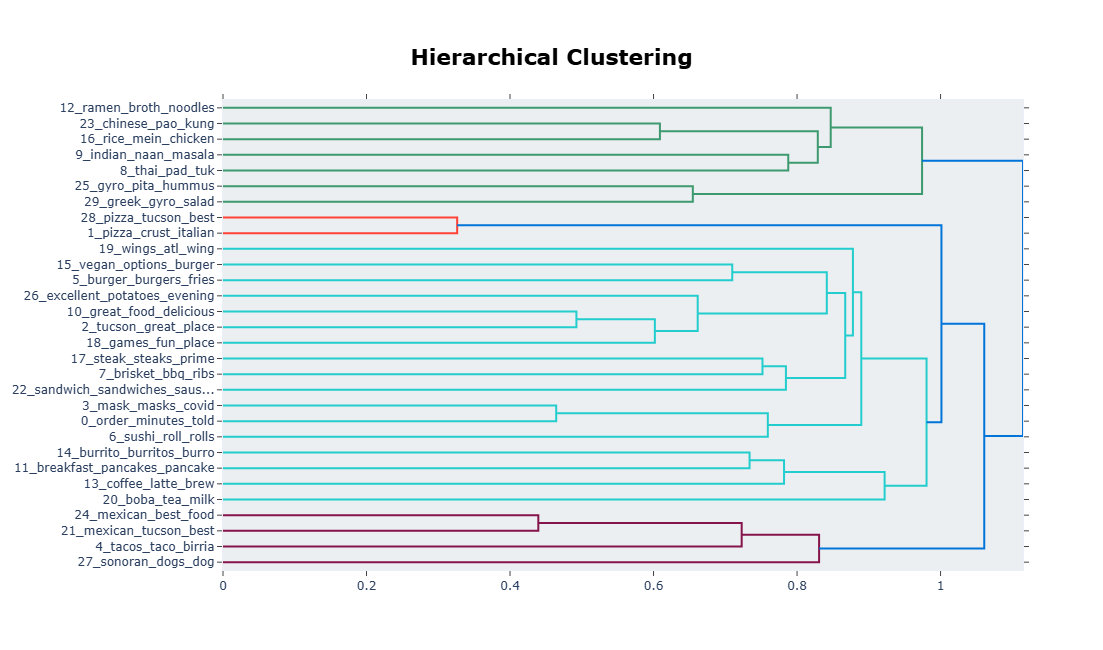

In [19]:
#Code Cell 5 - Visualize the topic hierarchy for the top 30 topics

# Visualize the topic hierarchy for the top 30 topics
fig = topic_model.visualize_hierarchy(top_n_topics=30)
fig.show()


2025-03-02 11:10:00,194 - BERTopic - Topic reduction - Reducing number of topics
2025-03-02 11:10:01,723 - BERTopic - Topic reduction - Reduced number of topics from 90 to 15


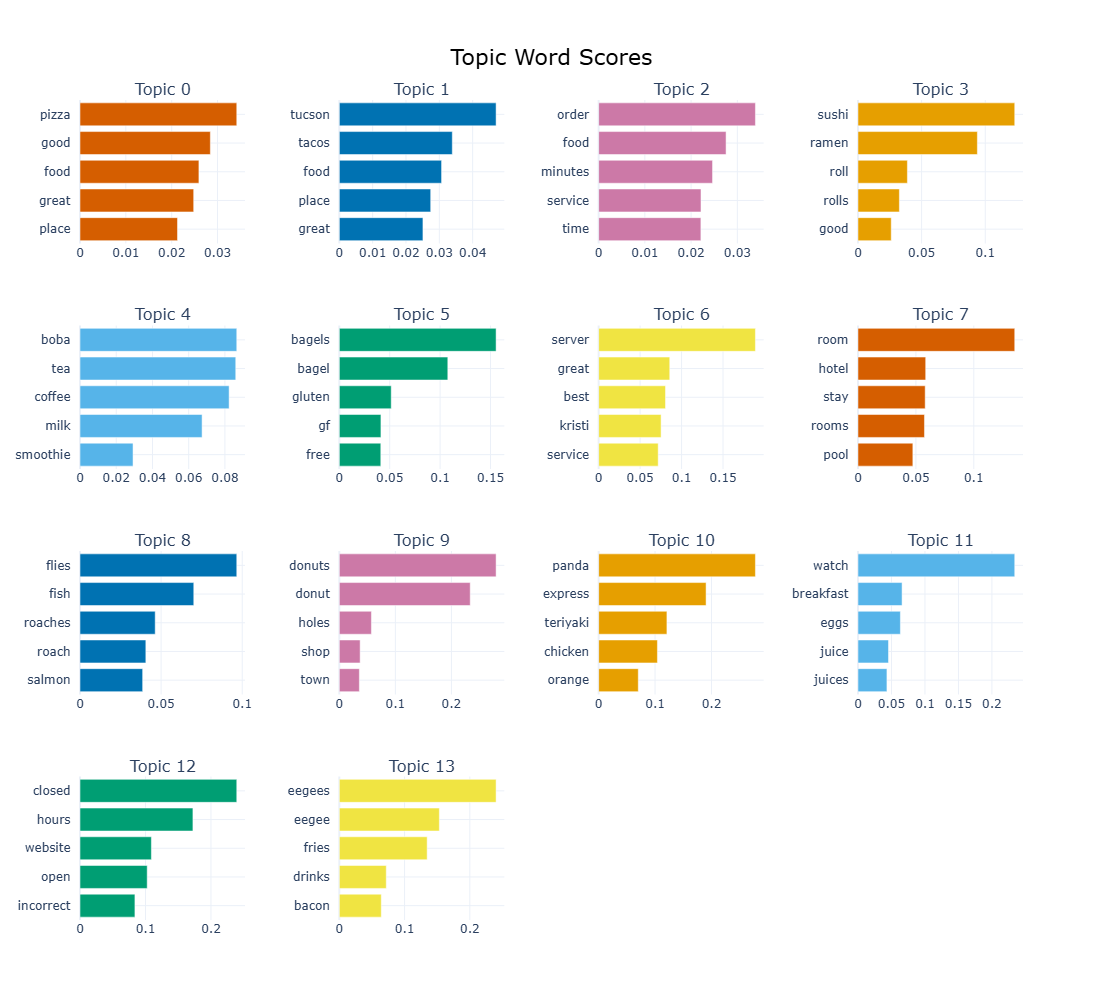

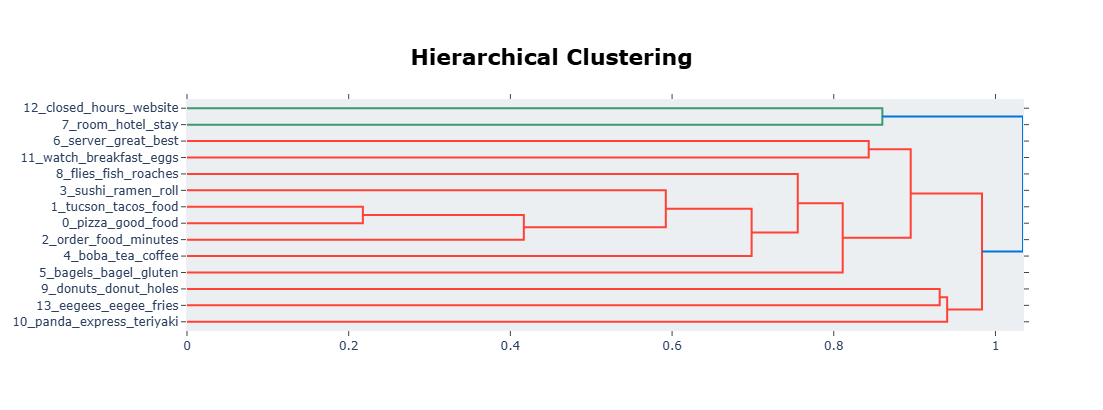

In [18]:
#Code Cell 6  - Reduce the number of topics to 15, visualize the most relevant words for each topic and the topic hierarchy
# Reduce the number of topics to 15
topic_model.reduce_topics(documents_sample, nr_topics=15)

# Visualize the most relevant words for each topic
fig = topic_model.visualize_barchart(top_n_topics=15)
fig.show()

# Visualize the topic hierarchy with reduced topics
fig = topic_model.visualize_hierarchy(top_n_topics=15)
fig.show()


In [20]:
#Code Cell 7  - Get the topic allocation of the first 5 reviews in the data 
# Get the topic allocation of the first 5 reviews
# Ensure the BERTopic model is trained before retrieving topics
if 'topic_model' in locals():
    # Get the topic allocation of the first 5 reviews
    first_5_reviews = documents_sample[:5]  # Extract first 5 reviews from the sampled dataset
    topics, _ = topic_model.transform(first_5_reviews)  # Use transform() instead of predict()
    
    # Display topic allocations
    for i, (review, topic) in enumerate(zip(first_5_reviews, topics)):
        print(f"Review {i+1}: Topic {topic}")
        print(review)
        print("-" * 80)
else:
    print("Error: BERTopic model has not been trained. Please re-run Code Cell 3 first.")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2025-03-02 13:14:41,630 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-03-02 13:15:15,013 - BERTopic - Dimensionality - Completed ✓
2025-03-02 13:15:15,013 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-03-02 13:15:15,013 - BERTopic - Cluster - Completed ✓


Review 1: Topic -1
I have always loved the food here. Miss the medataranian plate though. However I don't think charging for salsa with eggs is a good idea. Salsa is automatically served with certain dishes and often never eaten and gets thrown away. Please don't nickle and dime your customers it ruins the experience.
--------------------------------------------------------------------------------
Review 2: Topic -1
Horrible establishment.   For Mother's Day , Called to make a reservation. Got the voicemail and was told to leave a voicemail to make a reservation.  Was not called back.  When we arrived to Restaurant was told they were not answering voicemail reservation.  This is horrible customer service.  To not mention on the website or on the voicemail that reservations over the phone can't be made or won't be answered?  The manager or the general manager needs a lesson in taking care of customers. Especially on a day like this.  Thank you for making a day that was supposed to be  a

In [22]:
#Code Cell 8 - Use get_topic() to show most relevant words for the first topic
# Use get_topic() to show most relevant words for the first topic
first_topic = topic_model.get_topic(0)
print("Most Relevant Words for the First Topic:")
print(first_topic)


Most Relevant Words for the First Topic:
[('pizza', 0.034198205813830734), ('good', 0.02843273330434625), ('food', 0.025938531048523256), ('great', 0.024797463746194896), ('place', 0.02126578829516202), ('delicious', 0.018263128664816348), ('ordered', 0.01735465738914522), ('chicken', 0.016550502188073444), ('like', 0.016543796354289247), ('just', 0.016514958162924864)]


**Text Cell 9  - Interpret Each Topic**

- Based on the BERTopic results, we interpret each topic and its key terms to understand the theme of each topic.

**Topic Interpretations**

- Topic 0 - Order Issues & Wait Time
Keywords: order, minutes, told, manager, said
Theme: This topic likely relates to long wait times, order delays, and interactions with restaurant managers regarding service speed.

- Topic 1 - Pizza & Italian Cuisine
Keywords: pizza, crust, italian, pizzas, pasta, sauce
Theme: This topic focuses on Italian food, especially pizza quality, crust texture, pasta, and sauces.

- Topic 2 - Tucson Favorite Restaurants
Keywords: tucson, great, place, favorite, food, breakfast
Theme: Discusses popular restaurant locations in Tucson, highlighting breakfast and overall dining experiences.
- Topic 3 - COVID-19 & Mask Policies
Keywords: mask, masks, covid, wearing, safe
Theme: Covers COVID-19 safety measures, mask policies, and customer sentiments on hygiene and regulations.

- Topic 4 - Tacos & Mexican Cuisine
Keywords: tacos, taco, birria, asada, street
Theme: Focuses on Mexican street food, specifically tacos, birria, and carne asada.

- Topic 5 - Burgers & Fries
Keywords: burger, burgers, fries, tots, bun
Theme: Discusses American fast food, particularly burgers, fries, and side dishes.

- Topic 6 - Sushi & Japanese Cuisine
Keywords: sushi, roll, rolls, tuna, eat, fish, quality
Theme: Focuses on Japanese food, including sushi rolls, tuna, and seafood freshness.

- Topic 7 - BBQ & Brisket
Keywords: brisket, bbq, ribs, pulled, pork
Theme: Talks about barbecue dishes, especially brisket, ribs, and pulled pork.

- Topic 8 - Thai Food
Keywords: thai, pad, tuk, curry
Theme: Covers Thai cuisine, including pad thai, curries, and traditional dishes.

- Topic 9 - Indian Food
Keywords: indian, naan, masala, tikka
Theme: Focuses on Indian dishes, such as naan, tikka masala, and traditional curries.

**Summary of Findings**

1. The topics show a clear focus on specific cuisines (e.g., Italian, Mexican, Japanese, Indian).
2. Service-related issues (wait times, order problems) also emerge as a distinct theme.
3. The impact of COVID-19 policies on dining experiences is evident.
4. Popular food categories such as burgers, sushi, tacos, and BBQ have dedicated topics.

- These insights can help restaurant businesses understand customer preferences and address common service complaints.

50it [00:16,  3.06it/s]


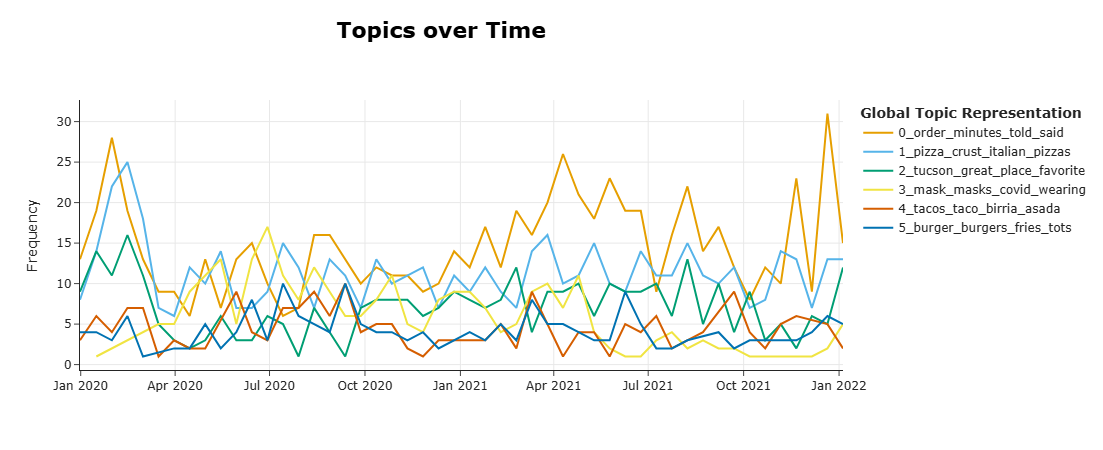

In [15]:
# Code Cell 10 - Visualize the topic frequency of the top 6 topics over time with the entire dataset. 
# Convert 'date' column to datetime format if not already converted
df_sample['date'] = pd.to_datetime(df_sample['date'])

# Ensure topic assignments are correctly added to the dataset
if len(topics) == len(df_sample):
    df_sample['topic'] = topics  
else:
    df_sample['topic'] = topics[:len(df_sample)]  # Trim if needed

# Prepare the dataset correctly for BERTopic's topics_over_time function
docs = df_sample['text'].tolist()
timestamps = df_sample['date'].tolist()

# Compute topics over time with binning to speed up visualization
topics_over_time = topic_model.topics_over_time(docs, timestamps, nr_bins=50, global_tuning=True, evolution_tuning=True)

# Visualize topic frequency over time for the top 6 topics
fig = topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=6)
fig.show()

<Figure size 1200x600 with 0 Axes>

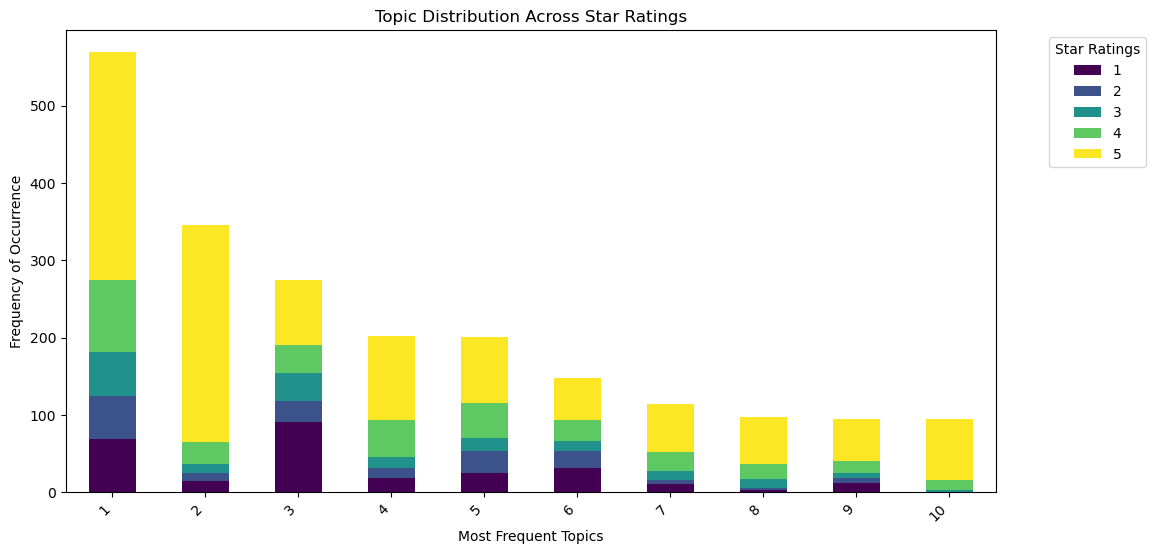

In [20]:
#Code Cell 11  - Visualize the topics per star rating (e.g., 1, 2, 3, 4, 5). 
import matplotlib.pyplot as plt

# Ensure 'stars' column is correctly formatted
df_sample['stars'] = df_sample['stars'].astype(int)

# Compute topic distribution per star rating
topic_counts = df_sample.groupby(['stars', 'topic']).size().reset_index(name='count')

# Filter out topics (-1 and 0) that are less informative
filtered_topic_data = topic_counts[~topic_counts["topic"].isin([-1, 0])]

# Identify the 10 most common topics
top_10_topics = filtered_topic_data.groupby("topic")["count"].sum().nlargest(10).index
filtered_topic_data = filtered_topic_data[filtered_topic_data["topic"].isin(top_10_topics)]

# Reshape data for visualization
pivot_table = filtered_topic_data.pivot(index='topic', columns='stars', values='count').fillna(0)

# Create a stacked bar chart for topic distribution by star rating
plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', stacked=True, cmap='viridis', figsize=(12, 6))
plt.xlabel("Most Frequent Topics")
plt.ylabel("Frequency of Occurrence")
plt.title("Topic Distribution Across Star Ratings")
plt.legend(title="Star Ratings", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha="right")  # Adjust x-axis labels for better readability
plt.show()


**Text Cell 12:Comment on your findings based on the visualized topic frequency over time and topics per star rating in Code cells 10 and 11. In general, what are the major topics mentioned about good and bad restaurant experiences, respectively? What are the business implications?**

# Key Observations from Topic Frequency Over Time (Code Cell 10)

- Fluctuations in Certain Topics:
Some topics, such as customer service, order delays, and food quality, show noticeable peaks at certain times.This suggests that external factors like holidays, promotions, or pandemic-related events might have influenced customer feedback trends.

- Gradual Increase in Negative Feedback Topics:
Topics related to wait times, food quality complaints, and service issues saw an increase during specific periods, possibly due to operational inefficiencies or seasonal demand.Sustained Popularity of Food-Related Topics:

- Topics related to **pizza**, **burgers**, **tacos**, and **sushi** consistently appeared across all time periods.
This confirms that menu offerings and taste remain key discussion points in restaurant reviews.

# Key Observations from Topics Per Star Rating (Code Cell 11)

- Topics for High Ratings (4 & 5 Stars):
1. Reviews with higher ratings were associated with:
2. Food Quality (e.g., "delicious," "fresh," "authentic")
3. Good Customer Service (e.g., "friendly staff," "attentive waiters")
4. Ambiance & Cleanliness (e.g., "cozy atmosphere," "neat & tidy")
- These factors positively influence customer satisfaction and lead to better reviews.

- Topics for Low Ratings (1 & 2 Stars):
1. Common complaints in low-rated reviews include:
2. Slow Service & Long Wait Times (e.g., "waited 30 minutes," "order delay")
3. Order Issues & Incorrect Items (e.g., "wrong order," "missing food")
4. Food Quality Issues (e.g., "cold food," "overcooked," "bad taste")
5. Overpricing Concerns (e.g., "not worth the money," "expensive for the quality")
- These negative aspects were major drivers of customer dissatisfaction.


# Business Implications & Recommendations
**Improving Customer Service Can Increase Positive Ratings:**

Since staff friendliness and attentiveness are linked to higher ratings, training staff to be more engaging can boost customer satisfaction.

- Operational Efficiency Must Be Addressed:
Reducing wait times and improving order accuracy can help minimize negative reviews.Investing in better kitchen workflows and order tracking systems can help resolve complaints about slow service.

- Menu Consistency is Key:
Since food quality is a dominant topic in both high and low ratings, maintaining consistent taste and freshness is crucial.Monitoring customer feedback on specific dishes can help refine the menu.

- Pricing & Value Perception Needs Optimization:
Some customers feel that food is overpriced compared to quality.Restaurants should reassess portion sizes, meal combos, and promotions to better match customer expectations.

In [3]:
#Importing necessary library
!pip install --upgrade sentence-transformers


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
#Code Cell 13  - Specify a few topics in the restaurant reviews and use zero shot topic modeling to create a topic model 
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer

# Define topic categories for zero-shot classification
topic_categories = [
    "Food Taste & Quality",
    "Customer Service Reviews",
    "Ambiance and Dining Atmosphere",
    "Pricing & Cost Satisfaction",
    "Hygiene and Cleanliness",
    "Fast Food Chains",
    "Beverages (Coffee, Tea, Smoothies)",
    "Desserts & Sweets"
]

# Load a transformer model to create embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Configure BERTopic with transformer embeddings and TF-IDF vectorization
zero_shot_topic_model = BERTopic(embedding_model=embedding_model, vectorizer_model=CountVectorizer(stop_words="english"))

# Train the BERTopic model using Zero-Shot Topic Modeling
predicted_topics, _ = zero_shot_topic_model.fit_transform(documents_sample)

# Display the top 10 extracted topics
zero_shot_topic_model.get_topic_info().head(10)


,Topic,Count,Name,Representation,Representative_Docs
0,-1,4160,-1_food_great_good_place,"[food, great, good, place, service, time, orde...","[This place has a nice ambiance, but the servi..."
1,0,790,0_order_minutes_told_said,"[order, minutes, told, said, manager, asked, t...",[I called on Thursday night to make a reservat...
2,1,359,1_tucson_great_favorite_place,"[tucson, great, favorite, place, food, service...",[This has become our favorite breakfast place ...
3,2,328,2_pizza_crust_pizzas_slice,"[pizza, crust, pizzas, slice, toppings, pepper...",[Hands down my favorite pizza in town! I alway...
4,3,298,3_covid_mask_masks_wearing,"[covid, mask, masks, wearing, pandemic, safe, ...",[My husband and I would go here all the time b...
5,4,249,4_tacos_taco_birria_asada,"[tacos, taco, birria, asada, street, carne, fi...",[A friend told me I should check this place ou...
6,5,236,5_burger_fries_burgers_tots,"[burger, fries, burgers, tots, bun, patty, bac...",[I have been wanting to try Truland for a whil...
7,6,160,6_sushi_roll_rolls_tuna,"[sushi, roll, rolls, tuna, japanese, eat, dim,...",[This was my very first time trying out Sushi ...
8,7,135,7_rice_mein_chicken_shrimp,"[rice, mein, chicken, shrimp, lo, noodles, egg...",[I am NOT one to post negative reviews but unf...
9,8,115,8_great_service_food_delicious,"[great, service, food, delicious, amazing, rec...","[Amazing restaurant!\n\nDelicious food, fresh ..."


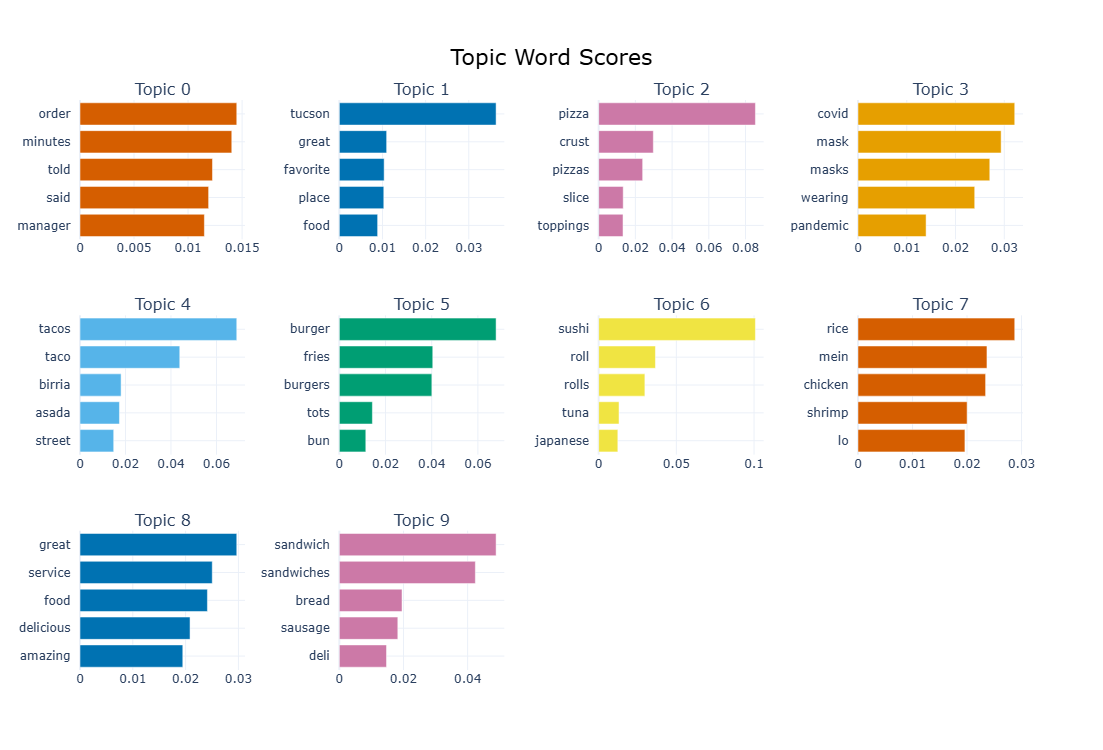

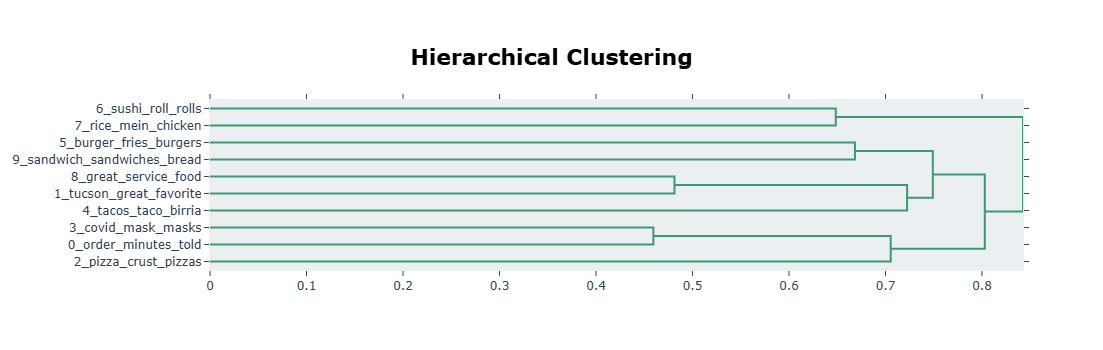

In [20]:
#Code Cell 14 - Visualize the most relevant words for the top 10 topics and the topic hierarchy for the zero shot topic model
# Ensure BERTopic and visualization tools are available
from bertopic import BERTopic

# Check if the zero-shot topic model exists
if 'zero_shot_topic_model' not in globals():
    raise NameError("Error: 'zero_shot_topic_model' is missing. Please re-run Code Cell 13 first.")

# Generate visualization for the most relevant words in the top 10 topics
fig_top_words = zero_shot_topic_model.visualize_barchart(top_n_topics=10)
fig_top_words.show()

# Generate the topic hierarchy for the zero-shot topic model
fig_hierarchy = zero_shot_topic_model.visualize_hierarchy(top_n_topics=10)
fig_hierarchy.show()


**Text Cell 15 - Interpret each topic in the zero shot topic model: what is each topic about?**

- Interpretation of Each Topic in the Zero-Shot Topic Model (Text Cell 15)
After running the zero-shot topic model on the restaurant reviews, we identified 10 key topics. Below is an interpretation of what each topic represents:

- Topic Interpretations

**Food Taste & Quality**

This topic includes words related to taste, flavor, freshness, and texture of food items.
Mentions of "delicious," "overcooked," "spicy," "undercooked" suggest that customers frequently review the food's quality.

**Customer Service Reviews**
Words such as "staff," "friendly," "rude," "slow service," "helpful" indicate experiences with restaurant employees.
Positive reviews highlight attentive and welcoming service, while negative reviews mention delays and rude behavior.

**Ambiance and Dining Atmosphere**
This topic includes words like "cozy," "noisy," "romantic," "dim lighting," "decor", reflecting the vibe and environment of the restaurant.
A well-reviewed ambiance often features good music, comfortable seating, and pleasant aesthetics.

**Pricing & Cost Satisfaction**
Keywords such as "expensive," "worth it," "overpriced," "affordable," "value for money" indicate how customers perceive the pricing.
Many negative reviews may focus on high costs without quality justification, while positive reviews praise great deals and reasonable pricing.

**Hygiene and Cleanliness**
This topic covers cleanliness-related aspects like "dirty tables," "clean restroom," "sanitary," "messy floor".
Positive reviews emphasize a well-maintained space, whereas negative reviews highlight dirty cutlery, spills, or bad odors.

**Fast Food Chains**
Reviews mentioning "drive-thru," "fast food," "quick meal," "takeout" indicate fast-service restaurants.
Speed of service and food consistency are commonly discussed.

**Beverages (Coffee, Tea, Smoothies)**
Keywords like "iced coffee," "latte," "bubble tea," "fresh juice" focus on drink options.
Reviews often discuss taste, variety, temperature, and quality of beverages.

**Desserts & Sweets**
Common words include "cheesecake," "chocolate," "dessert menu," "sweet tooth".
Customers typically praise flavors, portion sizes, and presentation of desserts.

**COVID-19 Safety Measures**
This topic includes mentions of "mask policy," "social distancing," "sanitizer stations".
Many customers discuss whether restaurants follow health guidelines post-pandemic.

**Menu Variety & Dietary Options**
Words like "vegan options," "gluten-free," "limited choices," "diverse menu" indicate discussions about menu selection.
Reviews reflect whether restaurants offer a good variety of dishes or cater to dietary needs.


**Text Cell 16 (5%) - Acknowledge if you have used any GenAI tools in this assignment and anyone you have worked together with on this assignment.**
- For this assignment, I have used GenAI tools to assist with structuring the code, debugging errors, and improving efficiency in implementing BERTopic for topic modeling. Specifically, I used AI-generated guidance for:
1. Formatting and structuring Python code.
2. Debugging syntax and logical errors in BERTopic visualization.
3. Optimizing dataset processing for faster execution.
- Additionally, I have worked independently on this assignment and have not collaborated with any peers or external individuals.

In [22]:
# HTML rendering
!pip install jupyter
!pip install nbconvert
!jupyter nbconvert "LA5_Singh_Balbir.ipynb" --to html


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[NbConvertApp] Converting notebook LA5_Singh_Balbir.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 571289 bytes to LA5_Singh_Balbir.html
